In [1]:
#importing python packages
from google.colab import files
import numpy as np
import pandas as pd


In [2]:
#uploading tourism dataset to google colab
files.upload()

Saving tourism.csv to tourism (1).csv


{'tourism.csv': b'"","Quarter","Region","State","Purpose","Trips"\n"1",1998-01-01,"Adelaide","South Australia","Business",135.0776903\n"2",1998-04-01,"Adelaide","South Australia","Business",109.987316\n"3",1998-07-01,"Adelaide","South Australia","Business",166.0346866\n"4",1998-10-01,"Adelaide","South Australia","Business",127.1604643\n"5",1999-01-01,"Adelaide","South Australia","Business",137.4485333\n"6",1999-04-01,"Adelaide","South Australia","Business",199.9125861\n"7",1999-07-01,"Adelaide","South Australia","Business",169.3550898\n"8",1999-10-01,"Adelaide","South Australia","Business",134.3579372\n"9",2000-01-01,"Adelaide","South Australia","Business",154.034398\n"10",2000-04-01,"Adelaide","South Australia","Business",168.7763637\n"11",2000-07-01,"Adelaide","South Australia","Business",223.0651159\n"12",2000-10-01,"Adelaide","South Australia","Business",241.2206893\n"13",2001-01-01,"Adelaide","South Australia","Business",132.5000378\n"14",2001-04-01,"Adelaide","South Australia","B

In [3]:
#reading dataset from uploaded tourism dataset
dataset = pd.read_csv("tourism.csv")
#displaying some head records from dataset
dataset.head()

,Unnamed: 0,Quarter,Region,State,Purpose,Trips
0,1,1998-01-01,Adelaide,South Australia,Business,135.077690
1,2,1998-04-01,Adelaide,South Australia,Business,109.987316
2,3,1998-07-01,Adelaide,South Australia,Business,166.034687
3,4,1998-10-01,Adelaide,South Australia,Business,127.160464
4,5,1999-01-01,Adelaide,South Australia,Business,137.448533


In [4]:
#dataset abalysis: finding total number of trips for each region
dataset.groupby('Region')['Trips'].sum()


Region
Adelaide                      42916.723153
Adelaide Hills                 2128.628646
Alice Springs                  4136.131228
Australia's Coral Coast       13522.809858
Australia's Golden Outback    13364.233557
                                  ...     
Western Grampians              5289.640921
Whitsundays                    8710.793772
Wilderness West                3047.395514
Wimmera                        2302.640079
Yorke Peninsula                8858.416019
Name: Trips, Length: 77, dtype: float64

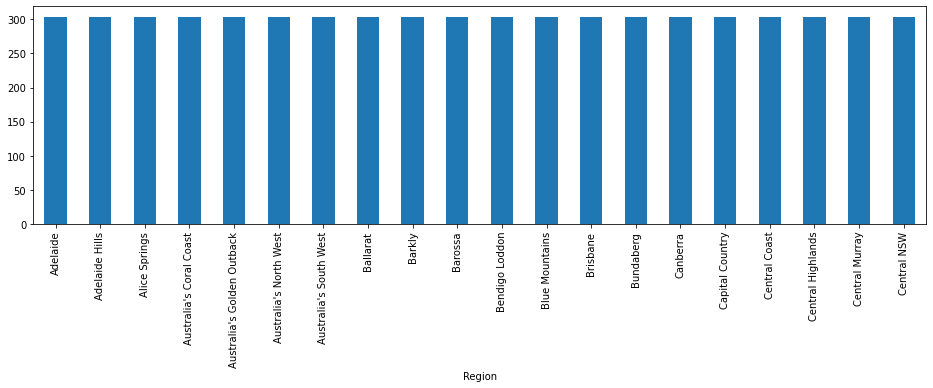

In [5]:
#displaying top 20 most visited regions 
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
region = dataset.groupby('Region').size().head(20)
region.plot(kind="bar")
plt.show()

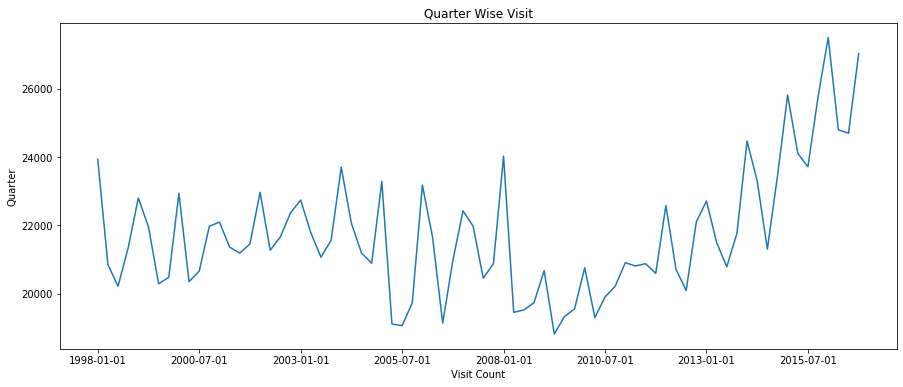

In [6]:
#plotting graph for year wise visit 
year_wise_visits = dataset.groupby(['Quarter'])['Trips'].sum()
year_wise_visits.plot(figsize=(15, 6))
plt.title("Quarter Wise Visit")
plt.xlabel('Visit Count')
plt.ylabel('Quarter')
plt.show()

In [7]:
#arranging dataset for visits in different regions based on quarter
dataset['Quarter'] = pd.to_datetime(dataset['Quarter']).dt.strftime('%Y-%m') 
dataFrame = pd.pivot_table(data=dataset, values='Trips', index='Region', columns='Quarter', aggfunc='sum', fill_value=0)
dataFrame.head()

Quarter,1998-01,1998-04,1998-07,1998-10,1999-01,1999-04,1999-07,1999-10,2000-01,2000-04,2000-07,2000-10,2001-01,2001-04,2001-07,2001-10,2002-01,2002-04,2002-07,2002-10,2003-01,2003-04,2003-07,2003-10,2004-01,2004-04,2004-07,2004-10,2005-01,2005-04,2005-07,2005-10,2006-01,2006-04,2006-07,2006-10,2007-01,2007-04,2007-07,2007-10,2008-01,2008-04,2008-07,2008-10,2009-01,2009-04,2009-07,2009-10,2010-01,2010-04,2010-07,2010-10,2011-01,2011-04,2011-07,2011-10,2012-01,2012-04,2012-07,2012-10,2013-01,2013-04,2013-07,2013-10,2014-01,2014-04,2014-07,2014-10,2015-01,2015-04,2015-07,2015-10,2016-01,2016-04,2016-07,2016-10
Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adelaide,658.553895,449.853934,592.904597,524.242760,548.394105,568.697801,538.052599,562.427678,646.356775,562.756079,556.300161,652.203306,569.556152,532.141606,567.277532,595.221138,646.680820,551.756651,572.206402,504.369044,556.379270,524.256529,601.122783,521.729504,633.305173,635.488040,598.114232,570.529739,581.229193,418.857960,524.886304,509.217145,587.837469,589.289138,513.835664,533.562280,607.452844,620.002683,524.612885,565.082894,596.438891,523.946077,507.180071,575.669861,507.807617,522.674641,542.733826,600.077739,479.873630,562.763487,418.247480,544.695523,563.547186,565.237741,457.397673,578.908998,532.218441,533.656791,539.970864,610.794943,503.186114,494.490214,587.558388,542.748240,602.269500,636.856739,505.326694,596.467178,632.116330,579.377842,548.330512,661.716715,708.930446,666.821570,635.569106,634.371320
Adelaide Hills,9.798630,26.066952,26.491072,27.256859,13.772975,27.022723,12.055189,15.663614,17.201173,18.367432,41.449526,20.677678,8.579473,26.128186,17.311903,15.698124,18.567261,29.447831,18.987180,92.346849,15.653897,16.683686,32.985480,25.566710,38.260839,27.367199,59.696056,22.140740,24.612316,21.928812,17.291613,22.958742,17.942695,18.812156,18.785899,24.679323,28.908138,24.107001,20.463534,30.757672,19.534303,28.387101,33.255330,26.165186,29.926547,19.634083,19.057390,29.195269,15.483155,18.945639,27.494948,30.899825,25.952539,19.332311,23.898737,34.770484,14.912371,41.644360,17.019930,33.815834,44.281803,46.979201,23.578543,36.450490,26.902083,40.179113,19.455441,25.026069,32.565580,58.259655,54.893572,43.218433,69.231751,13.928336,39.465833,52.394264
Alice Springs,20.207638,56.356223,110.918441,40.868270,48.368038,68.024894,76.689656,65.809763,32.382226,39.767602,92.385798,73.526107,37.208624,48.643648,97.178952,51.599565,25.432464,56.246488,97.416405,59.816567,15.593305,71.681121,65.964979,48.051560,27.786380,52.352060,104.577878,33.003328,29.771285,55.799219,91.302945,61.755262,42.939170,52.324604,66.114354,60.061960,36.285862,65.515914,71.152420,44.370031,25.199253,60.592144,81.488427,53.358756,18.215471,65.296890,70.791395,51.404256,24.671140,61.207870,75.885592,60.947251,34.898796,44.633405,75.248387,28.037278,38.698830,43.215737,65.677354,25.668302,18.965028,40.748583,61.052732,36.061507,25.640521,57.739413,55.058289,44.475037,23.096777,65.311558,96.258707,45.819495,27.705658,76.548159,120.967830,40.294387
Australia's Coral Coast,132.516409,172.615379,173.904335,207.002571,198.856638,252.746529,201.025431,178.707134,177.003089,161.517364,174.244708,182.168697,110.126651,204.610404,206.865202,221.754498,131.673032,240.910508,188.283363,179.233447,209.403071,192.765395,217.567765,190.275978,171.179714,170.862923,189.397292,180.327433,159.882873,166.065994,204.177140,148.111761,150.186995,170.773082,171.754286,195.575899,165.641829,196.882618,172.038562,166.861824,149.229216,161.530918,163.131476,150.644571,126.223688,141.035727,127.492224,133.425423,98.265046,117.306125,164.799693,149.425806,109.261546,191.368766,165.598991,108.610485,168.185383,187.220293,165.537779,152.107966,171.135549,168.133401,180.188078,132.364149,194.996735,186.055435,231.032610,196.951321,175.413639,219.597906,167.689212,217.657957,274.923899,279.911249,254.047538,256.812239
Australia's Golden Outback,161.726948,164.97378

Region=1, Forecasted=145.493070, Actual=83.928227
Region=2, Forecasted=44.926301, Actual=25.709937
Region=3, Forecasted=44.926301, Actual=30.865882
Region=4, Forecasted=122.337376, Actual=88.041288
Region=5, Forecasted=63.038150, Actual=102.374415
Region=6, Forecasted=421.708564, Actual=527.473168
Region=7, Forecasted=63.296035, Actual=59.649892
Region=8, Forecasted=388.331166, Actual=479.353000
Region=9, Forecasted=325.077791, Actual=221.750120
Region=10, Forecasted=662.420505, Actual=672.896207
Region=11, Forecasted=1958.223170, Actual=2369.815703
Region=12, Forecasted=676.880708, Actual=926.126073
Region=13, Forecasted=69.369269, Actual=114.619880
Region=14, Forecasted=835.004003, Actual=923.948922
Region=15, Forecasted=122.337376, Actual=143.472768
Region=16, Forecasted=85.555904, Actual=71.384664
Region=17, Forecasted=230.798162, Actual=230.668104
Region=18, Forecasted=204.902432, Actual=189.961263
Region=19, Forecasted=388.331166, Actual=323.612114
Region=20, Forecasted=73.184158

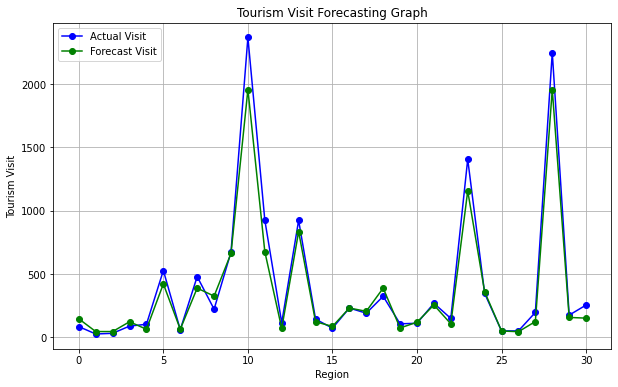

In [8]:

#here we are training trourism dataset with decision tree regression algorithm to forest visits for next quarter for
#each regions. Here we have divided dataset into train and test and then train decision tree regression algorithm and the
#forecast visits for next quarter for each regions
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
x_train = 12
y_train = 1
y_test = 12
dataset = dataFrame.values
time_periods = dataset.shape[1]
lag_loops = time_periods + 1 - x_train - y_train - y_test
training = []
for i in range(lag_loops):
    value = dataset[:,i:i+x_train+y_train]
    training.append(value)
training = np.vstack(training)
Xtrain, Ytrain = np.split(training,[x_train],axis=1)
max_column_test = time_periods - x_train - y_train + 1
testing = []
for i in range(lag_loops,max_column_test):
    testing.append(dataset[:,i:i+x_train+y_train])
testing = np.vstack(testing)
Xtest, Ytest = np.split(testing,[x_train],axis=1)

if y_train == 1:
    Ytrain = Ytrain.ravel()
    Ytest = Ytest.ravel()

tree = DecisionTreeRegressor(max_depth=50,min_samples_leaf=25,random_state=0,max_features='auto') 
tree.fit(Xtrain,Ytrain)

prediction = tree.predict(Xtest) 

actual = []
forecast = []
i = len(Ytest)-1
index = 0
while i > 0:
    actual.append(Ytest[i])
    forecast.append(prediction[i])
    print('Region=%d, Forecasted=%f, Actual=%f' % (index+1, prediction[i], Ytest[i]))
    index = index + 1
    i = i - 1
    if len(actual) > 30:
        break

rmse = sqrt(mean_squared_error(Ytest,prediction))
print('\n\nRMSE : ',round(rmse,1))

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Region')
plt.ylabel('Tourism Visit')
plt.plot(actual, 'ro-', color = 'blue')
plt.plot(forecast, 'ro-', color = 'green')
plt.legend(['Actual Visit', 'Forecast Visit'], loc='upper left')
#plt.xticks(wordloss.index)
plt.title('Tourism Visit Forecasting Graph')
plt.show()

